# __Cyclistic Case Study__

### Background

Cyclistic launched a bike-sharing program in 2016 with 5,824 bikes and 692 available stations across Chicago. There are 3 different pricing plans: single-ride, full-day, and annual. Riders that purchase single-ride or full-day are called casual riders. Riders that purchase annual are called Cyclistic members. According to financial analysts, members are more profitable.

## PHASE 1: ASK

### Key Objectives:

1. Identify the key stakeholders:
- Lily Moreno (director of marketing), marketing analytics team, executive team (decide whether to approve recommendations)

2. Define the business tasks:
- Maximize number of memberships
- Create marketing strategy to convert casual riders to annual members

3. Questions to answer:
- How do annual riders and casual riders use the bikes differently?
- Why would casual riders buy annual membership?
- How can the company use digital media to influence casual riders to become members?

## PHASE 2: PREPARE

1. Identify the data source:
- Public Cyclistic [data sets](https://divvy-tripdata.s3.amazonaws.com/index.html) ([licensed](https://ride.divvybikes.com/data-license-agreement) under Motivate International Inc.)
- Most recent 12 months used (01/2023 to 02/2022)

2. Determine the credibility of the data source, I will use the ROCCC approach.
- Reliability: MED - This data comes from the company, so it should be fairly reliable.
- Original: HIGH - This data is gathered by the company directly.
- Comprehensive: MED - This data provides a wide variety of useful information but does not have any information on the demographic
- Current: HIGH - This data is from the most recent 12 months.
- Cited: LOW - Unknown.

This data source is fairly reliable and can be used for high-level insights and recommendations.

## PHASE 3: PROCESS

### Load the packages

In [1]:
library(plyr)
library(tidyverse)
library(lubridate)
library(geodist)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Import the data sets

I will be merging the data sets all into one data frame.

In [2]:
m1 <- read_csv('/kaggle/input/google-casestudy-1-2022-2023/202202-divvy-tripdata.csv')
m2 <- read_csv('/kaggle/input/google-casestudy-1-2022-2023/202203-divvy-tripdata.csv')
m3 <- read_csv('/kaggle/input/google-casestudy-1-2022-2023/202204-divvy-tripdata.csv')
m4 <- read_csv('/kaggle/input/google-casestudy-1-2022-2023/202205-divvy-tripdata.csv')
m5 <- read_csv('/kaggle/input/google-casestudy-1-2022-2023/202206-divvy-tripdata.csv')
m6 <- read_csv('/kaggle/input/google-casestudy-1-2022-2023/202207-divvy-tripdata.csv')
m7 <- read_csv('/kaggle/input/google-casestudy-1-2022-2023/202208-divvy-tripdata.csv')
m8 <- read_csv('/kaggle/input/google-casestudy-1-2022-2023/202209-divvy-publictripdata.csv')
m9 <- read_csv('/kaggle/input/google-casestudy-1-2022-2023/202210-divvy-tripdata.csv')
m10 <- read_csv('/kaggle/input/google-casestudy-1-2022-2023/202211-divvy-tripdata.csv')
m11 <- read_csv('/kaggle/input/google-casestudy-1-2022-2023/202212-divvy-tripdata.csv')
m12 <- read_csv('/kaggle/input/google-casestudy-1-2022-2023/202301-divvy-tripdata.csv')
all_data <- bind_rows(m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12)

Rows: 115609 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 284042 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 371249 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

### Preview the data

In [3]:
head(all_data)
colnames(all_data)
dim(all_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,41.88462,-87.62783,41.91569,-87.63460,member
1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.92914,-87.64908,41.92877,-87.66391,member
BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,41.88462,-87.62783,41.87926,-87.63990,member
A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,41.94815,-87.66394,41.95283,-87.64999,member
07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,41.88462,-87.62783,41.88584,-87.63550,member
9A2F204F04AB7E24,classic_bike,2022-02-07 09:51:57,2022-02-07 10:07:53,St. Clair St & Erie St,13016,Franklin St & Monroe St,TA1309000007,41.89435,-87.62280,41.88032,-87.63519,member


[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] 5754248      13

In [4]:
# find all the NA values in each column
sapply(all_data, function(x) sum(is.na(x)))

# find duplicates
sum(duplicated(all_data$ride_id))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
            843525             843525             902655             902655 
         start_lat          start_lng            end_lat            end_lng 
                 0                  0               5899               5899 
     member_casual 
                 0

[1] 0

Due to only certain columns having NA values, I want to look at those rows more closely.

In [5]:
all_data %>%
filter(is.na(all_data$end_lat)) %>%
head()

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1F1E6810649A9E01,docked_bike,2022-02-18 18:51:18,2022-02-19 19:51:18,Wabash Ave & Grand Ave,TA1307000117,NA,NA,41.89147,-87.62676,NA,NA,casual
4A5DB0B7B07F42E4,classic_bike,2022-02-24 07:27:57,2022-02-25 08:27:47,MLK Jr Dr & 63rd St,KA1503000053,NA,NA,41.78008,-87.61594,NA,NA,casual
C0884642952963B6,classic_bike,2022-02-15 16:20:31,2022-02-16 17:20:26,Austin Blvd & Lake St,16906,NA,NA,41.88792,-87.77445,NA,NA,casual
8A8508A3B2E36B6F,classic_bike,2022-02-26 14:37:15,2022-02-27 15:37:09,Millennium Park,13008,NA,NA,41.88103,-87.62408,NA,NA,casual
8425446669F46A05,classic_bike,2022-02-17 12:02:27,2022-02-18 13:02:20,Wells St & Concord Ln,TA1308000050,NA,NA,41.91213,-87.63466,NA,NA,casual
ACFA4699373A39FE,classic_bike,2022-02-21 00:57:02,2022-02-22 01:56:54,Clinton St & Lake St,13021,NA,NA,41.88564,-87.64182,NA,NA,member


In [6]:
all_data %>%
filter(is.na(all_data$start_station_name)) %>%
head()

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A1D55B29161CC038,electric_bike,2022-02-28 18:51:10,2022-02-28 19:24:49,NA,NA,Kimball Ave & Belmont Ave,KA150400009X,41.91,-87.71,41.93940,-87.71156,member
49629A775A71F7C9,electric_bike,2022-02-05 07:07:31,2022-02-05 07:14:05,NA,NA,Logan Blvd & Elston Ave,TA1308000031,41.94,-87.70,41.92947,-87.68416,member
A47A1C59A94837E4,electric_bike,2022-02-23 07:53:24,2022-02-23 07:59:19,NA,NA,Morgan St & Polk St,TA1307000130,41.86,-87.65,41.87174,-87.65103,member
C1BC5557E24B9EFF,electric_bike,2022-02-02 11:03:40,2022-02-02 12:46:56,NA,NA,Wabash Ave & Grand Ave,TA1307000117,41.89,-87.63,41.89147,-87.62676,member
71900D26BD9248F5,electric_bike,2022-02-02 13:10:25,2022-02-02 13:23:49,NA,NA,Wabash Ave & Grand Ave,TA1307000117,41.89,-87.62,41.89147,-87.62676,member
ACF2C08C91A456F8,electric_bike,2022-02-02 13:35:26,2022-02-02 13:53:16,NA,NA,Wabash Ave & Grand Ave,TA1307000117,41.89,-87.62,41.89147,-87.62676,member


I decided to keep these NA values, since they still provide valuable information in regards to distance or time. Also, since I do not need station names, these NA values do not hurt my analysis.

### Alter/clean the data

In [7]:
# add two columns (ride length in mins and weekday)
all_data <- all_data %>% 
  mutate(ride_length = difftime(ended_at,started_at, units= 'mins')) %>% 
  mutate(weekday = weekdays(started_at))

# change data type for ride length to numeric from date time
all_data$ride_length <- as.numeric(all_data$ride_length)

# calculate distance in meters using Haversine formula
all_data$dist <- geodist_vec(
  x1 = all_data$start_lng
  , y1 = all_data$start_lat
  , x2 = all_data$end_lng
  , y2 = all_data$end_lat
  , paired = TRUE
  , measure = "haversine"
)

# convert distance from meters to miles
all_data$dist <- all_data$dist/1609

all_data %>% 
  select(ride_length, dist) %>% 
  summary()

  ride_length             dist         
 Min.   :-10353.35   Min.   :   0.000  
 1st Qu.:     5.77   1st Qu.:   0.541  
 Median :    10.20   Median :   0.976  
 Mean   :    19.31   Mean   :   1.327  
 3rd Qu.:    18.33   3rd Qu.:   1.725  
 Max.   : 41387.25   Max.   :6106.317  
                     NA's   :5899      

Due to the minimum being negative for ride length (this is impossible), I will be filtering only the positive values (>0). For distance, I will also be keeping all non-zero values.

In [8]:
# filter values to be bigger than 0 or to be NA
all_data <- all_data %>% 
  filter(ride_length > 0) %>% 
  filter(dist > 0 | is.na(dist))

all_data %>% 
  select(ride_length, dist) %>% 
  summary()

  ride_length            dist         
 Min.   :    0.02   Min.   :   0.000  
 1st Qu.:    5.98   1st Qu.:   0.620  
 Median :   10.28   Median :   1.029  
 Mean   :   19.11   Mean   :   1.404  
 3rd Qu.:   18.07   3rd Qu.:   1.789  
 Max.   :41387.25   Max.   :6106.317  
                    NA's   :5899      

### Create subsets for data frames (members vs casual)

In [9]:
# create subsets
casual <- subset(all_data, member_casual == 'casual')
member <- subset(all_data, member_casual == 'member')

dim(casual)

[1] 2165987      16

## STAGE 4: ANALYZE

### Summary of data

In [10]:
member %>% 
  select(ride_length, dist) %>% 
  summary()

casual %>% 
  select(ride_length, dist) %>% 
  summary()

  ride_length             dist         
 Min.   :   0.0167   Min.   :   0.000  
 1st Qu.:   5.2500   1st Qu.:   0.581  
 Median :   8.9000   Median :   0.980  
 Mean   :  12.6667   Mean   :   1.365  
 3rd Qu.:  15.1667   3rd Qu.:   1.739  
 Max.   :1559.9000   Max.   :6105.886  
                     NA's   :684       

  ride_length            dist         
 Min.   :    0.02   Min.   :   0.000  
 1st Qu.:    7.57   1st Qu.:   0.687  
 Median :   12.93   Median :   1.111  
 Mean   :   28.83   Mean   :   1.464  
 3rd Qu.:   23.22   3rd Qu.:   1.857  
 Max.   :41387.25   Max.   :6106.317  
                    NA's   :5215      

__Observations:__
- Average ride length: members - 12.67 mins, casual riders - 28.83 mins
- Average distance (miles): members - 1.37 miles, casual riders - 1.46 miles
- There are a lot more NA values for casual riders (5,215) compared to members (684) for distance.
- The max ride length is much higher for casual riders than members, but the max distance is about the same.

__Insights:__
- The disparity in ride length may be due to the fact that casual riders buy single-ride or full-day passes, and thus, each bike ride is for a purpose and most likely is for a longer time length on average. Members can bike to wherever, so they most likely will use their passes to bike whenever bike stations are available.
- The lack of disparity in distance is very interesting, since the logic applied above should be the same for this category. One possible explanation is that people will return their bikes near their original location, so the distance recorded in this category is not actually the true distance travelled.

__Questions:__
- Why are there so much more NA values for casual riders?

In [11]:
mean(member$dist,na.rm = T) #1.365
mean(casual$dist,na.rm = T) #1.464

# t-test
t.test(member$dist, casual$dist, alternative = 'two.sided')
# 95% confidence: biking distance for members will be 0.087 to 0.11 miles shorter than the biking distance for casual riders.
# p-value = 0 < 0.05, statistically significant
# This means that casual riders bike for longer distances than members.

mean(member$ride_length,na.rm= T) #12.67
mean(casual$ride_length,na.rm= T) #28.83

# t-test
t.test(member$ride_length, casual$ride_length, alternative = 'two.sided')
# 95% confidence: ride length is 15.8 to 16.5 mins longer for casual riders than for members.
# p-value = 0 < 0.05, statistically significant
# This means that casual riders bike for longer time frames than members.


[1] 1.364526

[1] 1.463819


	Welch Two Sample t-test

data:  member$dist and casual$dist
t = -16.118, df = 5394550, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.11136729 -0.08721926
sample estimates:
mean of x mean of y 
 1.364526  1.463819 


[1] 12.66668

[1] 28.83365


	Welch Two Sample t-test

data:  member$ride_length and casual$ride_length
t = -83.925, df = 2195382, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -16.54452 -15.78941
sample estimates:
mean of x mean of y 
 12.66668  28.83365 


I performed two sample t-tests for both the distance and ride length.

__Observations:__
- Both p-values were extremely low (rounded to 0), which means that the null hypotheses in both can be rejected. Casual riders ride their bikes for longer distances and for longer lengths of time.
- Based on a 95% confidence interval, casual riders ride their bikes for 0.087 to 0.11 miles farther than members, and casual riders ride 15.79 to 16.5 more minutes than members.

In [12]:
# find the most popular starting stations for both groups
casual %>% 
  drop_na(start_station_name) %>% 
  group_by(start_station_name) %>% 
  dplyr::summarize(n = n()) %>% 
  arrange(desc(n)) %>%
  head(10)

member %>% 
  drop_na(start_station_name) %>% 
  group_by(start_station_name) %>% 
  dplyr::summarize(n = n()) %>% 
  arrange(desc(n)) %>%
  head(10)

start_station_name,n
<chr>,<int>
Streeter Dr & Grand Ave,50197
DuSable Lake Shore Dr & Monroe St,27117
Millennium Park,22791
Michigan Ave & Oak St,21952
DuSable Lake Shore Dr & North Blvd,21833
Shedd Aquarium,18720
Theater on the Lake,16719
Wells St & Concord Ln,15901
Clark St & Armitage Ave,13197


start_station_name,n
<chr>,<int>
Kingsbury St & Kinzie St,24877
Clark St & Elm St,21846
Wells St & Concord Ln,21246
Clinton St & Washington Blvd,20447
University Ave & 57th St,20383
Ellis Ave & 60th St,19866
Clinton St & Madison St,19041
Wells St & Elm St,18998
Loomis St & Lexington St,18693


__Observations:__
- Casual riders often start riding from one particular station (Streeter Dr & Grand Ave), while there does not appear to be a starting station that is far more used for annual members.
- There is one common station in the top ten for both groups (Wells St & Concord Ln).

__Insights:__
- Those two stations mentioned above could have more advertising in the surrounding area due to the stations' popularity.

In [13]:
# change data type to Date from POSIXct
all_data$started_at <- as.Date(all_data$started_at)

# extract the month associated with the start time for biking
all_data$month <- month(ymd(all_data$started_at))

# change the number to months
mymonths <- c("Jan","Feb","Mar",
              "Apr","May","Jun",
              "Jul","Aug","Sep",
              "Oct","Nov","Dec")
all_data$month <- mymonths[all_data$month]

# find the most popular months for bike rides
all_data %>% 
  group_by(month) %>% 
  dplyr::summarize(n = n()) %>% 
  arrange(desc(n))

month,n
<chr>,<int>
Jul,776975
Aug,744426
Jun,724963
Sep,666896
May,593403
Oct,532687
Apr,345482
Nov,322664
Mar,265974


__Observations:__
- July, August, and June are the 3 most popular months for bike rides (summer months). 
- February, December, and January are the 3 least popular months for bike rides (winter months).

__Insights:__
- People dislike riding bikes in the winter but enjoy riding bikes in the summer.
- Prioritize advertising/rewards in the summer and other more active months.

In [14]:
# find number of each bike type
unique(member$rideable_type) # classic ; electric
table(member$rideable_type) # 1,663,850 ; 1,608,156

unique(casual$rideable_type) # classic ; docked ; electric
table(casual$rideable_type)  # 813,414 ; 146,764 ; 1,205,809

[1] "classic_bike"  "electric_bike"


 classic_bike electric_bike 
      1663850       1608156 

[1] "classic_bike"  "docked_bike"   "electric_bike"


 classic_bike   docked_bike electric_bike 
       813414        146764       1205809 

## PHASE 5: SHARE

### Visualize

I will first create barcharts to show which bike casual riders use vs. annual members.

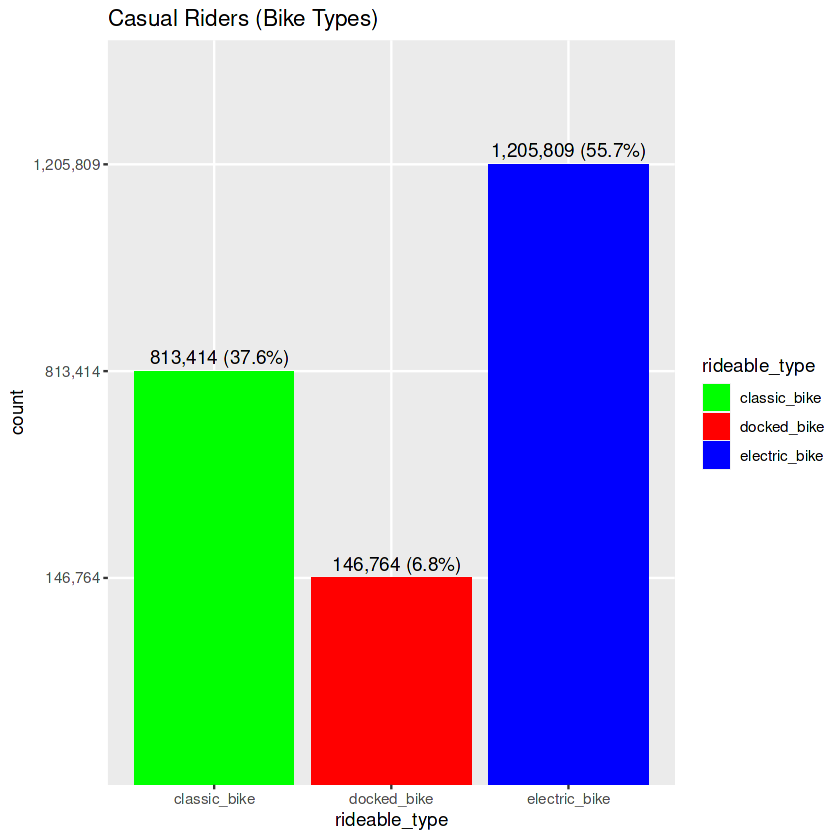

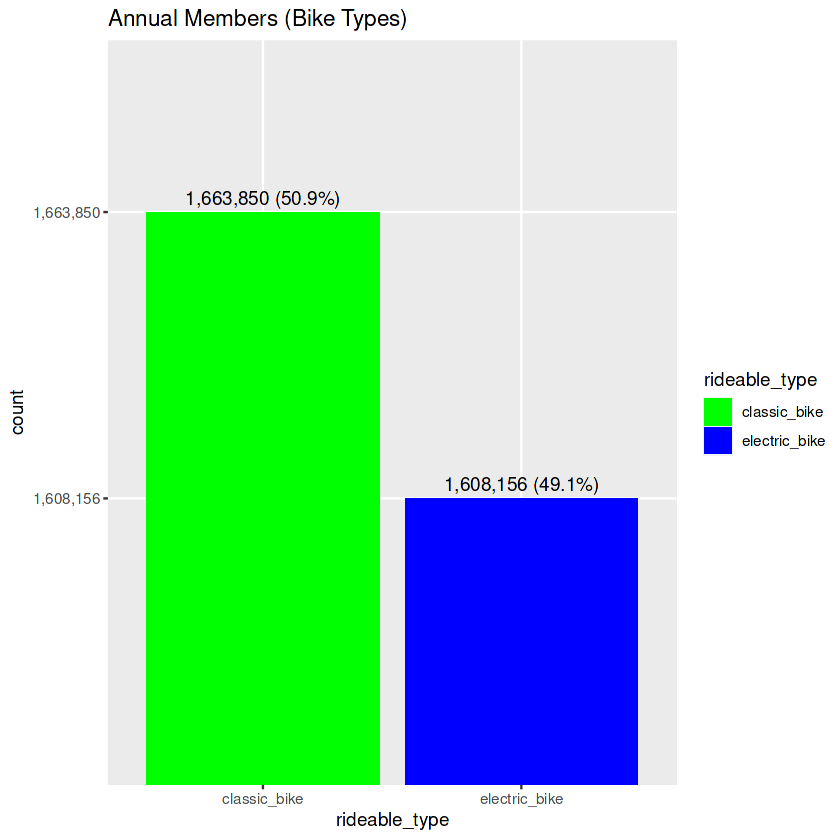

In [15]:
# create new df with new column for percentages for casual riders
casual_ridetype <- casual %>% 
  dplyr::count(rideable_type) %>% 
  dplyr::mutate(perc = n/sum(n) * 100)

# add commas to the count
casual_ridetype$n <- format(casual_ridetype$n, big.mark = ',', scientific = FALSE)

# barchart for casual riders with count and percents (y value does not start at 0)
ggplot(casual_ridetype, aes(x = rideable_type, y = n, fill=rideable_type)) + 
  geom_col() +
  geom_text(aes(x = rideable_type, y = n,
                    label =paste0(n, " (", round(perc,1),"%)")),
                    vjust = -0.5) +
  labs(title = 'Casual Riders (Bike Types)', y = 'count') +
  scale_fill_manual(values=c("green", "red", "blue"))

# create new df with new column for percentages for annual riders
member_ridetype <- member %>% 
  dplyr::count(rideable_type) %>% 
  mutate(perc = n/sum(n) *100)

# add commas to the count
member_ridetype$n <- format(member_ridetype$n, big.mark = ',', scientific = FALSE)

# barchart for annual riders with count and percents (y value does not start at 0)
ggplot(member_ridetype, aes(x = rideable_type, y = n, fill=rideable_type)) +
  geom_col() +
  geom_text(aes(x = rideable_type, y = n,
                    label =paste0(n, " (", round(perc,1),"%)")),
                    vjust = -0.5) + 
  labs(title = 'Annual Members (Bike Types)', y = 'count') +
  scale_fill_manual(values=c("green", "blue"))

_NOTE:_ Both barcharts do not start at 0.

__Barchart 1:__
The first barchart shows the bike types that casual riders use. There is an overwhelming number of electric bikes that are used with classic bikes being second and docked bikes being last with very little uses. 

__Barchart 2:__
The second barchart shows the bike types that annual members use. Classic and electric bikes are used almost the same number of times. 


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
   456523    462551    427196    375246    520177    514283    516030 


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
   313577    257668    437859    358919    290136    249027    258801 

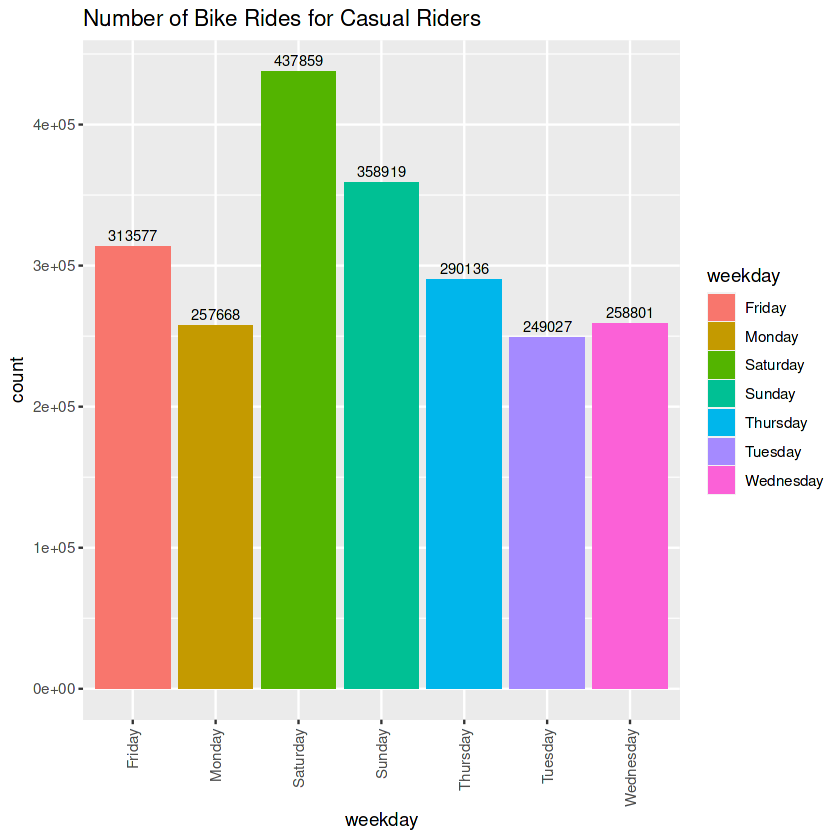

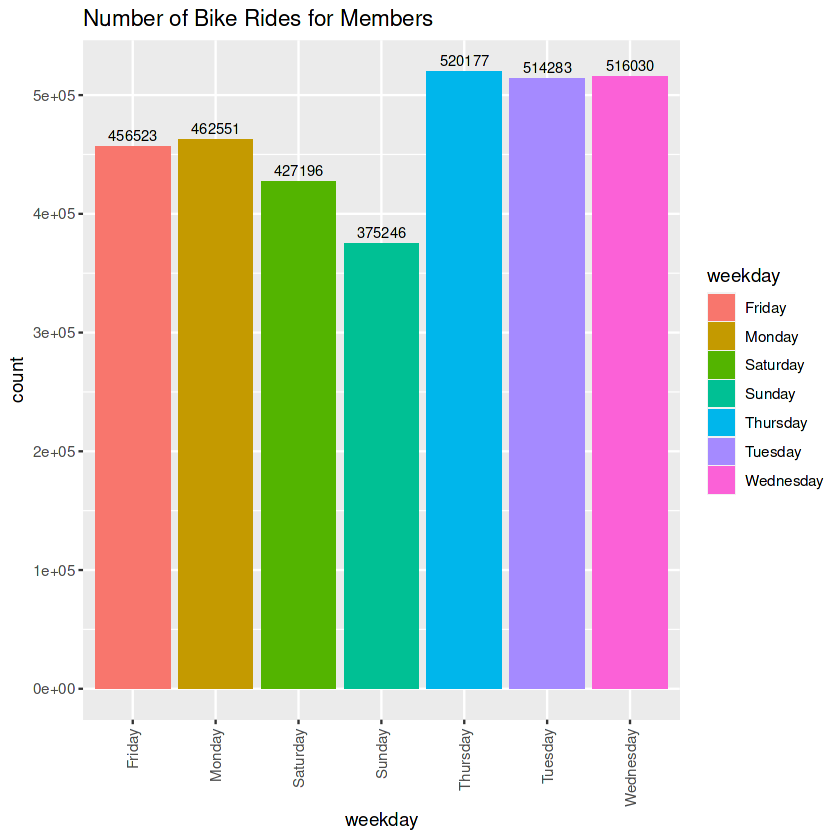

In [16]:
# look at values for bike rides for each weekday
table(member$weekday)
table(casual$weekday)

# create barchart for number of bike rides for each day for casual riders
ggplot(casual, aes(x = weekday, fill=weekday, label = after_stat(count))) +
  geom_bar() +
  geom_text(stat = 'count', vjust = -0.5, size = 3) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(title = 'Number of Bike Rides for Casual Riders')

# create barchart for the number of bike rides for each day for members
ggplot(member, aes(x = weekday, fill=weekday, label = after_stat(count))) +
  geom_bar() +
  geom_text(stat = 'count', vjust = -0.5, size = 3) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(title = 'Number of Bike Rides for Members')



__Barchart 1:__
This barchart looks at the number of bike rides for casual riders for each day. Saturday is the most popular day for bike rides with Sunday being second and with Friday and Thursday being close behind in that order. The rest of the days are roughly the same with a fairly big disparity in terms of bike rides.

__Barchart 2:__
This barchart looks at the number of bike rides for annual members for each day. Tuesday, Wednesday, and Thursday are the most popular days with Sunday being last by a fairly large margin.

__Insights:__
The difference in bike rides for each day depending on the biker group is most likely due to the different intentions. Casual riders are probably buying passes to have fun, sightsee, etc., which is why the most popular days are Friday and the weekend. Annual members are probably using the bikes to get to work, which is why the middle of the week is most popular for them and why Sunday is the least popular.

## PHASE 6: ACT


### Key insights 
1. Casual riders, on average, ride for longer periods of time and for slightly longer distances. Also, they ride more on the weekends, while members ride more on work days such as Tues, Wed, and Thurs. 
2. Casual riders prefer electric bikes the most, while there does not seem to be much of a preference for either classic or electric bikes for members.
3. Summer months are the most popular times for bike riding, while winter months are the least popular.


### Recommendations for marketing strategy
1. Promote a rewards program or have some incentive for using electric bikes if you are an annual member
    - Casual members prefer using this type of bike, so they would be more willing to switch in exchange for benefits.
    
    
2. Have special perks for those who ride for a certain time length if you are an annual member

3. Advertise heavily in the summer and can have advertising campaigns/billboards near the more popular bike riding stations, especially near Streeter Dr & Grand Ave. This station is the most popular starting station by far for casual riders and provide a lot of awareness for the benefits of becoming an annual member.

Additional relationships I could have looked at:
1. scatterplot to see correlation between bike type and ride length (potentially tells me if people prefer using one bike over the other for longer distances)
2. see which months are the most popular for riding (can have more ads run at this time)